In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from pprint import pprint 

def pp(x, *args):
    pprint(x) if not args else (pprint(x), pp(*args))

(-0.05, 1.05, -0.1, 2.1)

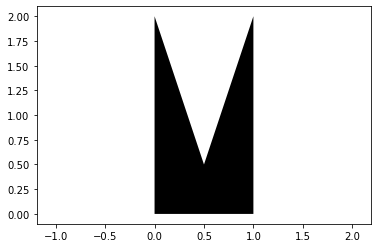

In [63]:
pts = np.array([(0,0), (1,0), (1,2), (0.5, 0.5), (0,2), (0,0)])
x = pts[:, 0]
y = pts[:, 1]
fig, ax = plt.subplots()
ax.fill(x, y, facecolor="black", linewidth=5)
ax.axis("equal")

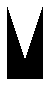

In [111]:
def strip_plt(xdim, ydim):
    """Creates normalized x dimension of fig, ax to dimension of 1."""
    fig = plt.figure()
    ax = plt.Axes(fig, [0, 0, 1, 1])  # remove edges
    ax.margins(0)
    ax.axis(False)
    ax.axis("equal")
    fig.set_size_inches(xdim/ydim, 1, forward=False)
    fig.add_axes(ax)
    return fig, ax 

def poly2img(poly_np):
    """Converts poly_np to img."""
    x, y = poly_np[0], poly_np[1]
    xdim, ydim = np.max(x) - np.min(x), np.max(y) - np.min(y) 
    fig, ax = strip_plt(xdim, ydim) 
    
    # Suppress output
    plt.close(fig)

    ax.fill(x, y, facecolor="black", linewidth=0)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

    # Reconstruct matrix as img
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return img[:, :, 0]  # don't need rgb for bw

img = poly2img(pts.T)

# TEMP
fig2, ax2 = strip_plt(*img.shape[::-1])
ax2.imshow(img, cmap='gray')
